# Praca domowa 1
## Karol Degórski

## Eksploracja zbioru danych *Forest fires*

## Import potrzebnych pakietów

In [1]:
import pandas as pd
import numpy as np

import time

from pandas_profiling import ProfileReport


from matplotlib import pyplot as plt
import seaborn as sns

## Wczytanie danych dotyczących spalonej powierzchni lasów w północnej Portugalii

In [2]:
forest_fires_df = pd.read_csv('forest_fires_dataset.csv')
forest_fires_df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32.0,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71.0,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70.0,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42.0,4.0,0.0,0.00


* Jest relatywnie mało rekordów, bo tylko 517  
* Będzie konieczność przekształcenia kolumn month i day - regresja nie lubi danych tekstowych

## Podstawowe informacje o danych

In [3]:
forest_fires_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    float64
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 52.6+ KB


* Nie ma żadnych braków danych  
* Kolumny month i day mają typ tekstowy, a pozostałe kolumny typ liczbowy

In [4]:
forest_fires_df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


* Trzeci kwartyl w rain to 0 - dużo wartości 0 dla tej zmiennej
* Drugi kwartyl w area to 0,52 - dużo wartości 0 lub bliskich 0

In [5]:
# Przekształcamy nazwy dni tygodnia i nazwy miesiący na liczby
forest_fires_df['day'] = forest_fires_df['day'].apply(lambda x: time.strptime(x, "%a").tm_wday + 1)
forest_fires_df['month'] = forest_fires_df['month'].apply(lambda x: time.strptime(x, "%b").tm_mon)
forest_fires_df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.00
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32.0,2.7,0.0,6.44
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71.0,5.8,0.0,54.29
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70.0,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42.0,4.0,0.0,0.00


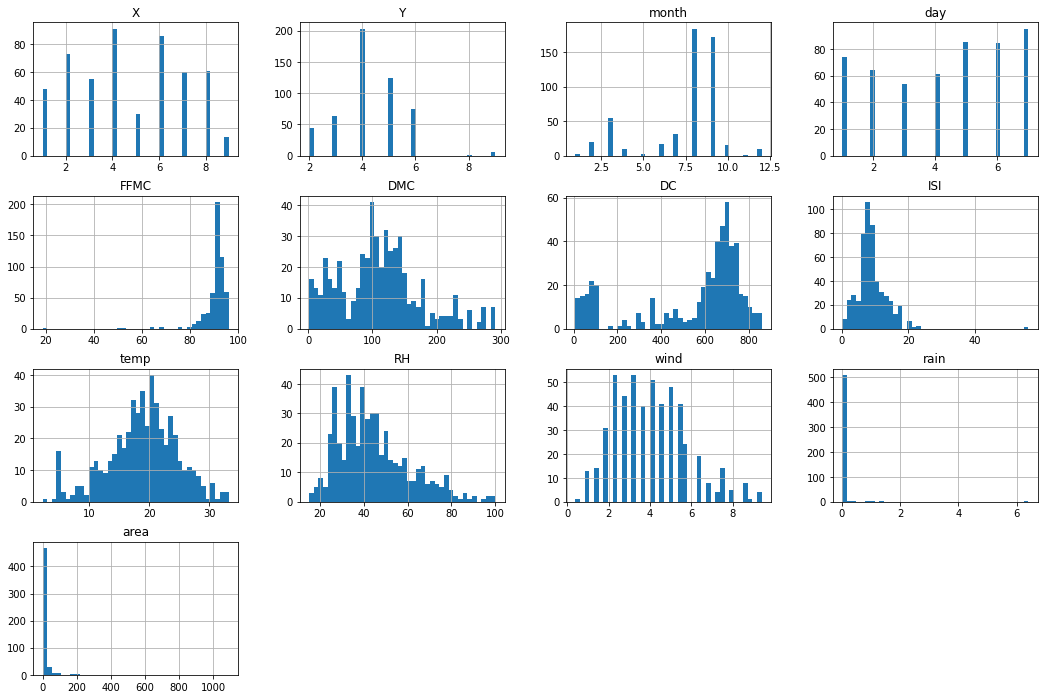

In [6]:
forest_fires_df.hist(bins = 40, figsize=(18, 12))

plt.show()

* Zmienne X, Y, month, day są to zmienne dyskretne  
* Zmienne FFMC, DMC, DC, ISI, temp, RH, wind, rain to zmienne ciągłe  
* Zmienna celu (area) też jest ciągła  

 * Zmienna rain ma bardzo dużo wartości 0 (oznacza to że raczej nie pada)
 * Zmienna celu również ma dużo wartości 0  (nie dziwi nas to, bo wartość 0 oznacza po prostu pożar na tyle mały, że jego powierznia została uznana za 0)

* największa liczba pożarów miała miejsce w sierpniu i we wrześniu (miesiące letnie, kiedy to jest najcieplej, a więc ryzyko pożaru największe)
* najwieksza liczba pożarów miała miała miejsce w piątki, soboty i niedziele - weekendy (dni, w które ruch turystyczny jest największy, a więc i ryzyko pożaru spowodowane przez nieodpowiedzialność ludzi wzrasta)

 * temp ma bardzo ładny rozkład normalny  
 * FFMC oraz DC ma rozkład lewostronnie skośny  
 * ISI oraz rain ma rozkład prawostronnie skośny  
 * Area również ma rozkład prawostronnie skośny  


In [7]:
# Warto zlogarytmować cechę area
forest_fires_df['area'] = np.log1p(forest_fires_df['area'])

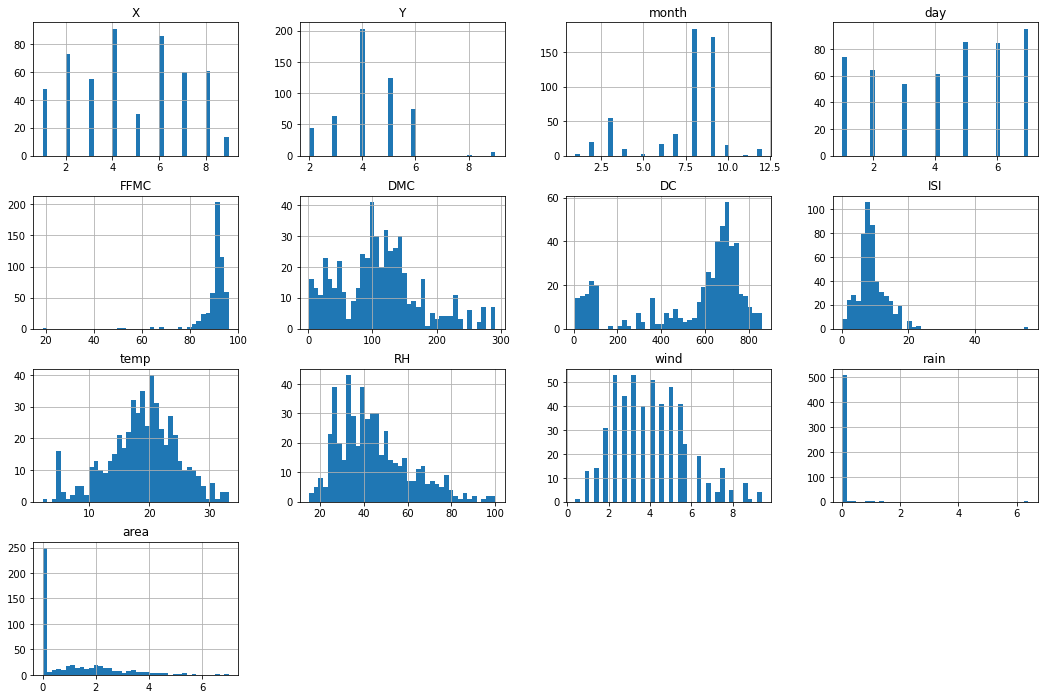

In [8]:
forest_fires_df.hist(bins = 40, figsize=(18, 12))

plt.show()

Teraz już trochę lepiej wygląda rozkład area

## Wykresy korelacyjne

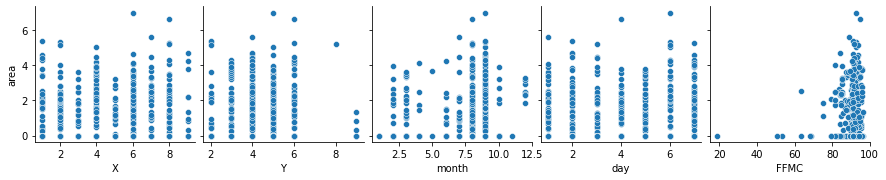

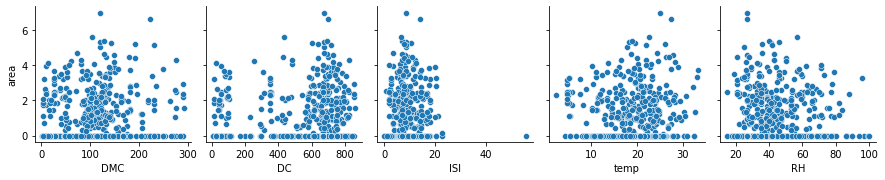

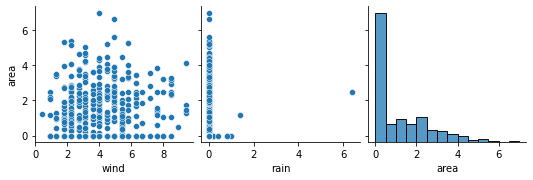

In [9]:
# Narysujemy wykresy korelacyjne między area, a pozostałymi
sns.pairplot(forest_fires_df, y_vars="area", x_vars=forest_fires_df.columns.values[:5])
sns.pairplot(forest_fires_df, y_vars="area", x_vars=forest_fires_df.columns.values[5:10])
sns.pairplot(forest_fires_df, y_vars="area", x_vars=forest_fires_df.columns.values[10:])

plt.show()

## Macierz korelacji

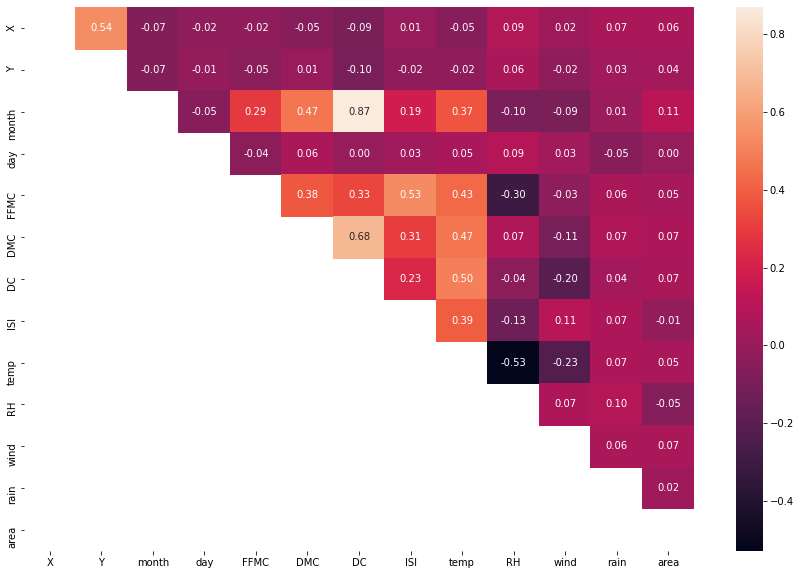

In [10]:
# Narysujemy macierz korelacji
forest_fires_corr = forest_fires_df.corr()
mask = np.triu(np.ones_like(forest_fires_corr, dtype=bool)).transpose()

plt.subplots(figsize=(15,10))
sns.heatmap(forest_fires_corr, mask = mask, annot=True, fmt='.2f')
plt.show()

Znaczące korelacje z macierzy korelacji:
* X jest dodatnio skorelowany z Y
* month jest dodatnio skorelowany z DMC i z DC
* FFMC jest dodatnio skorelowany z ISI i z temp
* DMC jest dodatnio skorelowany z DC i z temp

* temp jest ujemnie skorelowany z RH

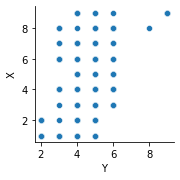

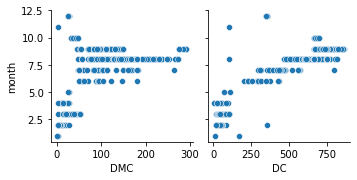

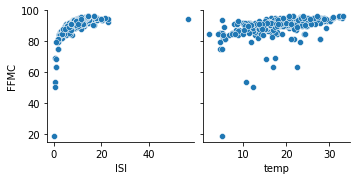

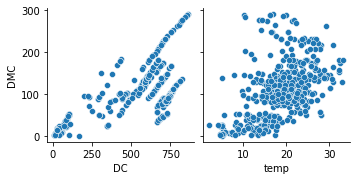

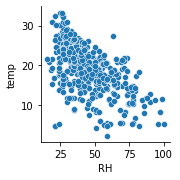

In [11]:
# Zobaczymy odkryte zależności na wykresach punktowych (rodzaj wykresów korelacyjnych)

sns.pairplot(forest_fires_df, y_vars="X", x_vars="Y")
sns.pairplot(forest_fires_df, y_vars="month", x_vars=["DMC", "DC"])
sns.pairplot(forest_fires_df, y_vars="FFMC", x_vars=["ISI", "temp"])
sns.pairplot(forest_fires_df, y_vars="DMC", x_vars=["DC", "temp"])
sns.pairplot(forest_fires_df, y_vars="temp", x_vars="RH")

plt.show()

* Widać bardzo ładną dodatnią korelację pomiędzy DMC, a DC (może nie warto uwzględniać tych dwóch zmiennych w modelu) - można było spodziewać się takiej korelacji ponieważ na wartość wskaźnika DC wpływa temperatura i opady, a na wartość wskażnika DCM wpływają temperatura, opady i wilgotność względna. Zatem nawet intuicyjnie powinny te wskaźniki, zależeć od siebie

* Jest też dodatnia korelacja pomiędzy temp, a DMC, ale już nie tak wyraźna jak poprzednio (do obliczania DMC używa się temperatury)
* Oraz jest wyraźna ujemna korelacja pomiędzy temp i RH - również można było się spodziwać takiej zależności, korzystając z fizyki


## Narzędzie pandas-profiling

Wykorzystamy narzędzie pandas-profiling, które generuje bardzo przyjemne raporty. Narzędzie to pozwala badać korelacje pomiędzy wybranymi dwoma zmiennymi, generuje
macierze korelacji wykorzystując różne współczynniki korelacji, pokazuje podstawowe statystyki o poszczególych zmiennych,
oraz przykładowe rekordy danych. Wykorzystując to narzędzie można zaoszczędzić sporo czasu pisania kodu (ale generowanie raportu też zajmuje relatywnie dużo czasu), jednakże
samodzielne pisanie kodu daje dużo większe możliwości w analizowaniu danych. Ponadto wykorzystanie automatycznej ekploracji nie zwalnia z obowiązku zamieniania typów danych (np. nazwy miesięcy na numery). To zadanie pozostaje do  manualnego wykonania.

In [12]:
profile = ProfileReport(forest_fires_df, title='Pożary lasów w Portugali')

# profile.to_widgets() # wyświetlenie w postaci osadzonego "widżetu"
# profile.to_notebook_iframe() # wyświetlenie w postaci osadzonego kodu html
profile.to_file("forest_fires_df.html") # zapis do pliku html

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]